# Google Play Store: Aplicaciones y reseñas

Analisis completo del mercado de aplicaciones android, donde compararemos mas de 10.000 aplicaciones en la google play en diferentes categorias.al realizar este analisis podremos  diseñar estrategias que impulsen el crecimiento de las mismas.

Trabajaremos con dos archivos:
* apps.csv: contiene todos los detalles de las aplicaciones en Google Play.contiene 13 columnas

* user_reviews.csv: contiene 100 reseñas para cada app, previamente se proceso el texto de cada reseña y se clasificio por 3 caracteristicas por sentimientos (positivos, negativos, neutral) Polaridad del sentimiento y Subjetividad del sentimiento.

### 1. Vamos a conocer nuestros datasets
Importe los datos, elimine filas duplicadas e inspeccione los datos.

In [4]:
# Imortamos los datos
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

In [5]:
#eliminacion de todas las filas dupplicadas
apps = apps_with_duplicates.drop_duplicates()

#imprimimos el numero total de aplicaciones
print('Número total de aplicaciones en el dataset = ', apps.shape)

Número total de aplicaciones en el dataset =  (9659, 14)


In [6]:
#imprimimos un resumen conciso de nuestro dataset
# rating, size, current ver, android ver contienen datos nulos
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


In [7]:
#luego realizamos una inspeccion de nuestros datos de forma aleatoria
print(apps.sample(5))

      Unnamed: 0                                          App  \
2655        3384                     ASUS Cover for ZenFone 2   
5495        6507                   BN Pro ArialXL Legacy Text   
1093        1327                                  Pocket Yoga   
2710        3444  Simple Neon Blue Future Tech Keyboard Theme   
7684        8801                        Dr. Panda Supermarket   

                Category  Rating  Reviews  Size     Installs  Type  Price  \
2655     PERSONALIZATION     4.4    43960   9.8  10,000,000+  Free      0   
5495  LIBRARIES_AND_DEMO     4.1      142   0.4      10,000+  Free      0   
1093  HEALTH_AND_FITNESS     4.4     2107   NaN     100,000+  Paid  $2.99   
2710     PERSONALIZATION     4.1    51145   6.2  10,000,000+  Free      0   
7684              FAMILY     4.2     1357  58.0      50,000+  Paid  $2.99   

     Content Rating                    Genres       Last Updated  \
2655       Everyone           Personalization   December 1, 2017   
5495      

### 2. Limpieza de los dato
Pero al momento de analizar la informacion del dataset me he dado cuento que las columnas Installs y Price son de tipo object( String) y no int o float como deberia ser. esto se debe a que las columnas contienen numeros y cadenas de textos. entonces procederemos a limpiar nuestros datos para que queden listo y puedan ser consumidos mas adelantes.

hay que tener en cuenta que las columnas Installs y Price contienen caracteres especiales como (, $ +) esto es un factor que dificulta su conversión a un tipo de datos numéricos.

In [8]:
# creamos una lista que contenga los caracteres especiales ,$+
chars_to_remove = ["+",",","$"]
# creamos una lista que contenga los nombres de las columnas installs y price
cols_to_clean = ["Installs","Price"]


#para cada columna
for col in cols_to_clean:
    # para cada caracter
    for char in chars_to_remove:
        # reemplazamos los caracteres con la cadena vacia ''
        #lambda es una funcion anonima
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
    # finalmente convertimos las columnas installs y price a tipo de dato flotante
    #usando la funcion astype
    apps[col] = apps[col].astype(float)

### 3. Explorando categorias de las apps

Las empresas buscan que sus aplicaciones sean mas visibles para ello Google implementado agrupar aplicaciones en categorías.
Esto genera las siguientes preguntas:

¿Qué categoría tiene la mayor participación de aplicaciones (activas) en el mercado?
¿Alguna categoría específica domina el mercado?
¿Qué categorías tienen la menor cantidad de aplicaciones?

Veremos que hay 33 categorías de aplicaciones únicas presentes en nuestro conjunto de datos. Las aplicaciones Familiares y de Juegos tienen la mayor prevalencia del mercado. Curiosamente, las aplicaciones Herramientas, Empresariales y Médicas también se encuentran en la parte superior.

In [9]:
# procederemos a crear un gráfico de barras que muestre la distribución de aplicaciones en diferentes categorías.
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Imprime el número total de categorías únicas 
num_categories = len(apps["Category"].unique())
print('Numero de categorias = ', num_categories)

# contamos el número de aplicaciones en cada 'Categoría'. luego ordenamos de forma descendente
# segun la cantidad de aplicaciones en cada categoría
num_apps_in_category = apps["Category"].value_counts().sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Numero de categorias =  33


### 3. Distribución de calificaciones de aplicaciones
Después de haber sido testigo de la participación de mercado para cada categoría de aplicaciones, veamos cómo funcionan todas estas aplicaciones en promedio. Las calificaciones de las aplicaciones (en una escala del 1 al 5) afectan la capacidad de descubrimiento, la conversión de las aplicaciones y la imagen de marca general de la empresa. Las calificaciones son un indicador clave de rendimiento de una aplicación.

De nuestra investigación, encontramos que el volumen promedio de calificaciones en todas las categorías de aplicaciones es 4.17. El gráfico del histograma está sesgado hacia la izquierda, lo que indica que la mayoría de las aplicaciones tienen una calificación alta, con solo unas pocas excepciones en las aplicaciones de baja calificación.

In [14]:
# hallamos la calificacion promedio de las aplicaciones por medio de la funcion mean = media
avg_app_rating = apps["Rating"].mean()
print('Calificación promedio de la aplicación = ', avg_app_rating)

# luego graficaremos por medio de un histograma la 
# Distribución de aplicaciones según sus valoraciones
data = [go.Histogram(
        x = apps['Rating']
)]

# Línea punteada vertical para indicar la calificación promedio de la aplicación
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Calificación promedio de la aplicación =  4.173243045387998


### 5. Tamaño y precio de una aplicación
Examinemos ahora el tamaño y el precio de la aplicación. En cuanto al tamaño, si la aplicación móvil es demasiado grande, puede resultar difícil y / o costoso para los usuarios descargarla. Los tiempos de descarga prolongados pueden desanimar a los usuarios incluso antes de que experimenten su aplicación móvil. Además, el dispositivo de cada usuario tiene una cantidad limitada de espacio en disco. Por el precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o económicas. Estos problemas se agravan si el mundo en desarrollo es parte de su mercado objetivo; especialmente debido a las velocidades de Internet, el poder adquisitivo y los tipos de cambio.

¿Cómo podemos idear estrategias para determinar el tamaño y el precio de nuestra aplicación?

¿El tamaño de una aplicación afecta su calificación?
¿Los usuarios realmente se preocupan por las aplicaciones pesadas del sistema o prefieren las aplicaciones ligeras?
¿El precio de una aplicación afecta su calificación?
¿Los usuarios siempre prefieren las aplicaciones gratuitas a las pagas?
Encontramos que la mayoría de las aplicaciones mejor calificadas (calificación superior a 4) oscilan entre 2 MB y 20 MB. También encontramos que la gran mayoría de las aplicaciones cuestan menos de $ 10.

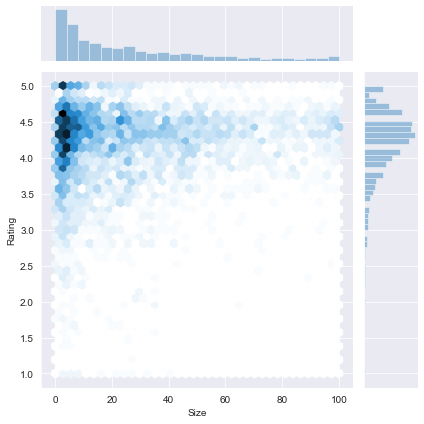

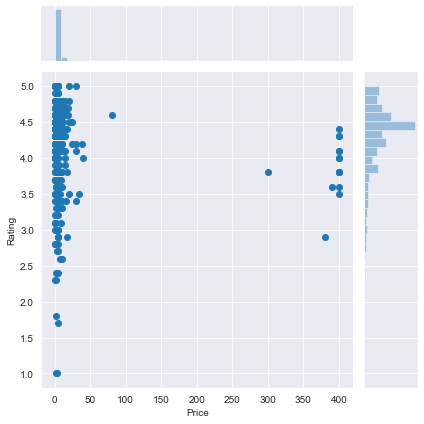

In [18]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# seleccionamos la filas que no sean nulas de las columnas Rating y Size
apps_with_size_and_rating_present = apps[ (~apps['Rating'].isnull()) & (~apps['Size'].isnull()) ]


# creamos un subconjunto de las categorias que tienen al menos 250 aplicaciones
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)



# graficamos un diagrama de dispersion donde veremos el Rating en funcion de Size
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# seleccionamos todas las aplicaciones de tipo pagas
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']


# graficamos un diagrama de dispersion donde veremos el Rating en funcion de Price
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

### 6. Relación entre la categoría de la aplicación y el precio de la aplicación
Así que ahora viene la parte difícil. ¿Cómo se supone que las empresas y los desarrolladores lleguen a fin de mes? ¿Qué estrategias de monetización pueden utilizar las empresas para maximizar las ganancias? Los costos de las aplicaciones se basan en gran medida en las características, la complejidad y la plataforma.

Hay muchos factores a considerar al seleccionar la estrategia de precios adecuada para su aplicación móvil. Es importante considerar la disposición de su cliente a pagar por su aplicación. Un precio incorrecto podría romper el trato incluso antes de que ocurra la descarga. Los clientes potenciales podrían desanimarse por lo que perciben como un costo impactante, o pueden eliminar una aplicación que han descargado después de recibir demasiados anuncios o simplemente no obtener el valor de su dinero.

Las diferentes categorías exigen diferentes rangos de precios. Algunas aplicaciones que son simples y se usan a diario, como la aplicación de calculadora, probablemente deberían mantenerse gratuitas. Sin embargo, tendría sentido cobrar por una aplicación médica altamente especializada que diagnostica a pacientes diabéticos. A continuación, vemos que las aplicaciones médicas y familiares son las más caras. ¡Algunas aplicaciones médicas se extienden incluso hasta $ 80! Todas las aplicaciones de juegos tienen un precio razonable por debajo de los 20 dólares.

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


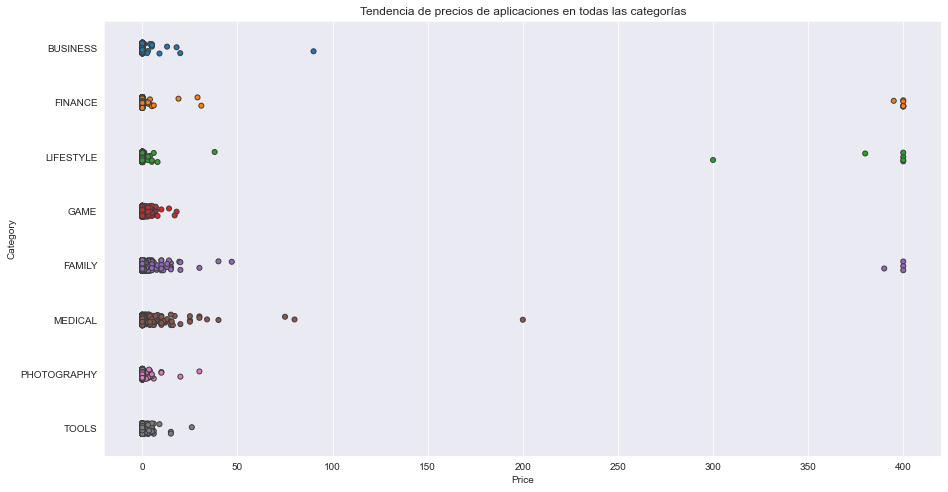

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# seleccionamos algunas categorias de las apps populares
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# luego examinamos la tendencia de price vs category por medio de un grafico de bandas
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('Tendencia de precios de aplicaciones en todas las categorías')

# extraemos las Aplicaciones cuyo precio es superior a 200 dolares
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

### 7. Filtracion de las aplicaciones "basura"
Parece que muchas de las aplicaciones realmente caras son aplicaciones "basura". Es decir, aplicaciones que realmente no tienen un propósito. Algunos desarrolladores de aplicaciones pueden crear una aplicación llamada I Am Rich Premium o la aplicación más cara (H) solo para bromear o para probar sus habilidades de desarrollo de aplicaciones. Algunos desarrolladores incluso hacen esto con intenciones maliciosas e intentan ganar dinero esperando que las personas hagan clic accidentalmente en comprar en su aplicación en la tienda.

Filtremos estas aplicaciones basura y volvamos a hacer nuestra visualización.

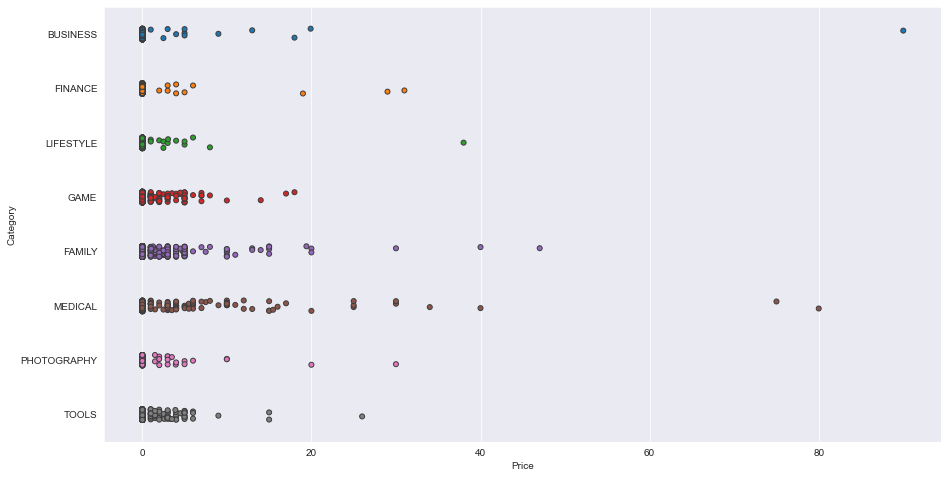

In [31]:
# seleccionaremos las apps con un precio menor que 100 dolares
apps_under_100 = popular_app_cats[popular_app_cats['Price'] <=100]


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# luego examinamos el price vs category de estas apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)



### 8. Popularidad de aplicaciones pagas frente a aplicaciones gratuitas
Para las aplicaciones en la Play Store de hoy, existen cinco tipos de estrategias de precios: gratis, freemium, de pago, paymium y suscripción. Centrémonos solo en aplicaciones gratuitas y de pago. Algunas características de las aplicaciones gratuitas son:

Descarga gratuita.
La principal fuente de ingresos a menudo proviene de la publicidad.
A menudo creado por empresas que tienen otros productos y la aplicación sirve como una extensión de esos productos.
Puede servir como una herramienta para la retención de clientes, la comunicación y el servicio al cliente.
Algunas características de las aplicaciones pagas son:

Los usuarios deben pagar una vez para que la aplicación la descargue y la use.
El usuario no puede realmente familiarizarse con la aplicación antes de comprarla.
¿Las aplicaciones pagas se instalan tanto como las aplicaciones gratuitas? Resulta que las aplicaciones pagas tienen un número relativamente menor de instalaciones que las aplicaciones gratuitas, ¡aunque la diferencia no es tan marcada como hubiera esperado!

In [13]:
trace0 = go.Box(
    # Datos para apps pagas
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Datos para apps gratis
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Número de descargas de aplicaciones pagas frente a aplicaciones gratuitas",
    yaxis = dict(title = "Número de registro de descargas",
                type = 'log',
                autorange = True)
)

# agregamos trace0 y trace1 para ser graficados
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

### 9. Análisis de opiniones de los usuarios
La extracción de datos de reseñas de usuarios para determinar cómo se sienten las personas acerca de su producto, marca o servicio se puede realizar mediante una técnica llamada análisis de sentimientos. Las reseñas de los usuarios de las aplicaciones se pueden analizar para identificar si el estado de ánimo es positivo, negativo o neutral sobre esa aplicación. Por ejemplo, las palabras positivas en la reseña de una aplicación pueden incluir palabras como "asombroso", "amigable", "bueno", "excelente" y "amor". Las palabras negativas pueden ser palabras como "malware", "odio", "problema", "reembolso" e "incompetente".

Al trazar las puntuaciones de polaridad de sentimiento de las opiniones de los usuarios para aplicaciones pagas y gratuitas, observamos que las aplicaciones gratuitas reciben muchos comentarios duros, como lo indican los valores atípicos en el eje y negativo. Las reseñas de aplicaciones pagas nunca parecen ser extremadamente negativas. Esto puede indicar algo sobre la calidad de la aplicación, es decir, que las aplicaciones pagas son de mayor calidad que las aplicaciones gratuitas en promedio. La puntuación media de polaridad de las aplicaciones pagas es un poco más alta que la de las aplicaciones gratuitas, por lo que se sincroniza con nuestra observación anterior.

In [33]:
# cargamos el dataset
reviews_df = pd.read_csv("datasets/user_reviews.csv")

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Review                  37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [34]:
reviews_df.sample(5)

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
14765,"BigOven Recipes, Meal Planner, Grocery List & ...",I loved update I constantly prompted log in. I...,Positive,0.350000,0.566667
2670,"AD - Nieuws, Sport, Regio & Entertainment",Cookies are not optional. I do not want to be ...,Neutral,0.000000,0.000000
35830,Door Lock Screen,So far Door lock screen working great. Easy se...,Positive,0.096577,0.578720
13928,Been Together (Ad) - D-day,NaN,NaN,NaN,NaN
26972,Clash Royale,Its Ok! I Rated 3 Star Because I Have Lot Time...,Positive,0.050000,0.700000


Text(0.5, 1.0, 'Distribución de la polaridad del sentimiento')

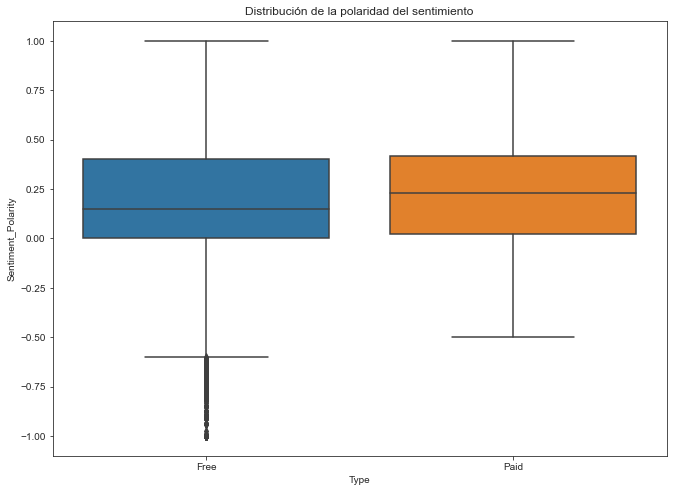

In [23]:
# unimos los dos dataframes por medio de la columna que tiene en comun app
merged_df = pd.merge(apps, reviews_df, on='App')

# eliminamos los registros NAN en las columnas Sentiment y Review
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# creacion de un diagrama de caja de type vs Sentiment_Polarity
ax = sns.boxplot(x = merged_df['Type'], y = merged_df['Sentiment_Polarity'], data = merged_df)
ax.set_title('Distribución de la polaridad del sentimiento')